In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values 

In [6]:
df.duplicated().sum()

0

No duplicates

In [7]:
#Converting TotalCharges column to numeric 
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]['TotalCharges'][488]

' '

There are only 11 columns with TotalCharges value = ' ' i.e a blank space  
So we can remove/ drop these

In [9]:
df1 = df[df['TotalCharges']!=' ']
df1.shape

(7032, 21)

In [10]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1['TotalCharges'].dtype

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\2889137608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])


dtype('float64')

In [11]:
categorical_cols = []
for col in df1.columns:
    if df1[col].dtype==object:
        if col not in ['customerID', 'Churn']:
            categorical_cols.append(col)

In [12]:
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [13]:
for col in categorical_cols:
    print(f"{col}: {df1[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\3179917863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\3179917863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [15]:
len(categorical_cols)

15

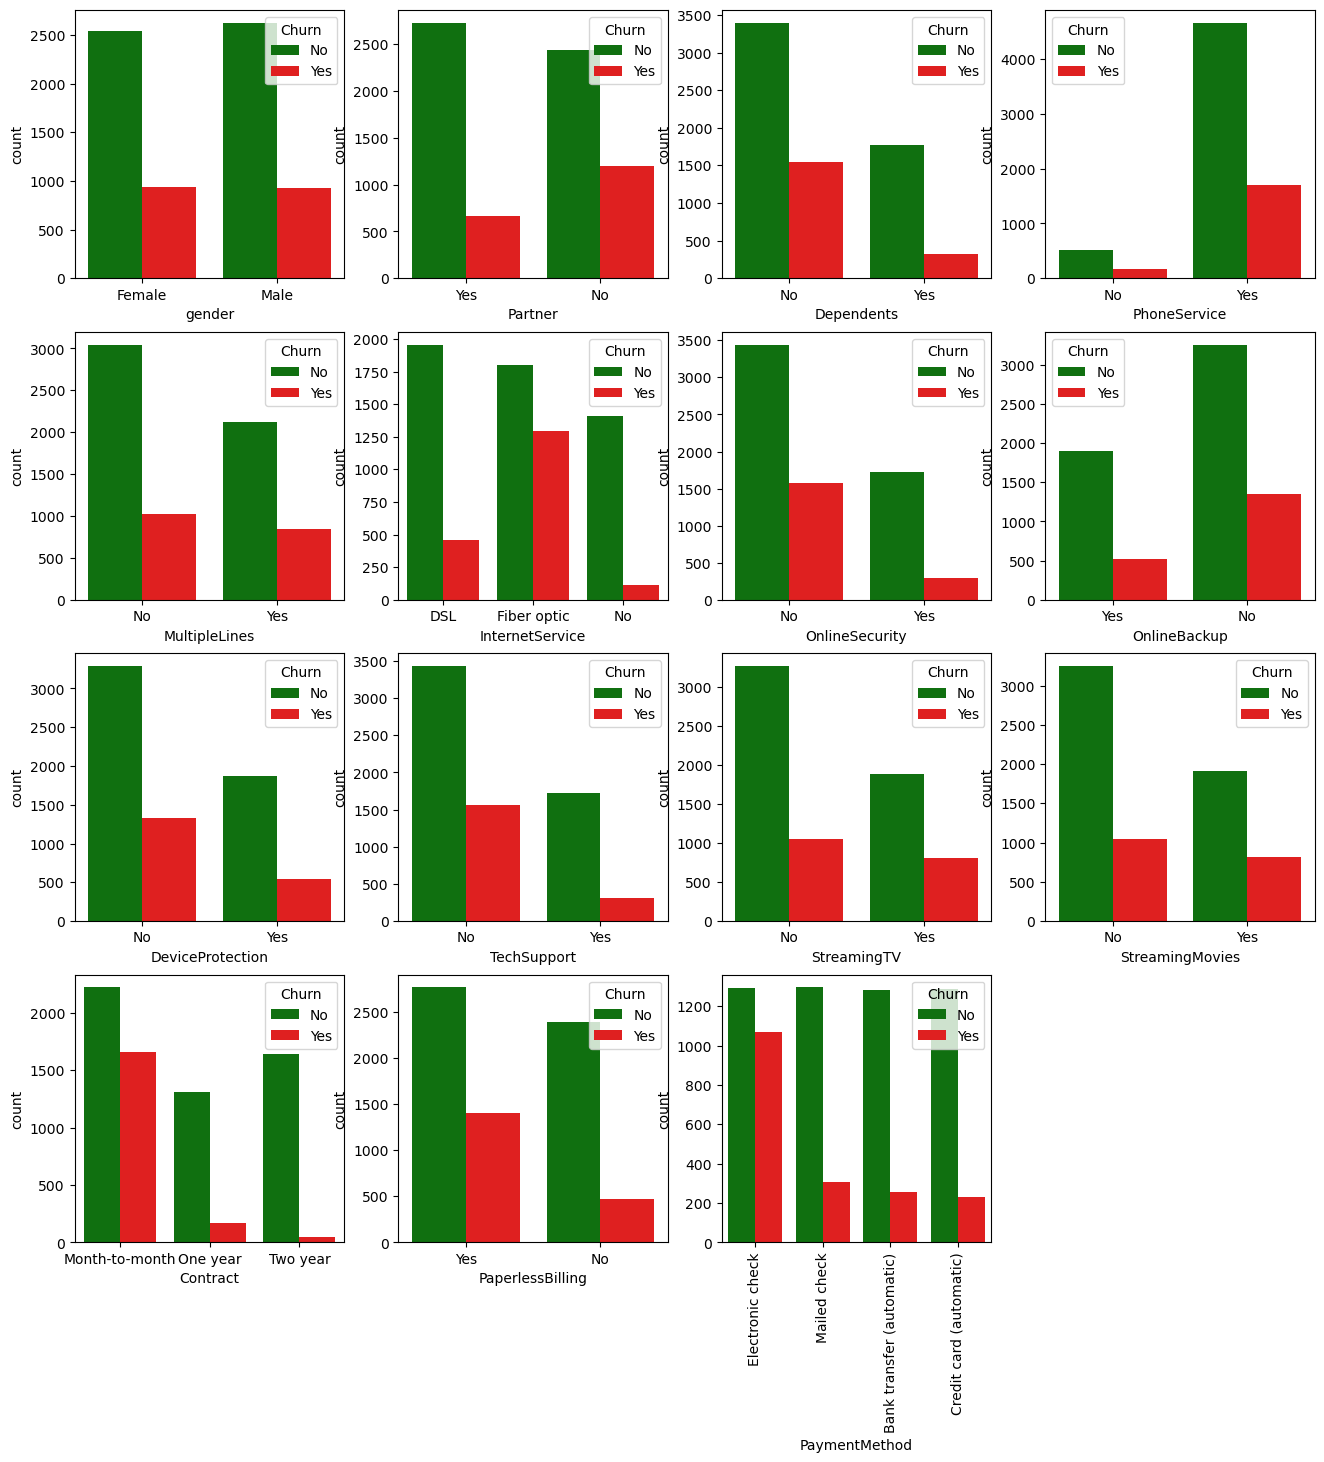

In [16]:
plt.figure(figsize=(16,16))
for i, col in enumerate(categorical_cols):
    plt.subplot(4,4,i+1)
    sns.countplot(data=df1, x=col, hue='Churn', palette={'Yes': 'red', 'No': 'green'})
    if col=='PaymentMethod':
        plt.xticks(rotation='vertical')

Using color red to show customer left

Observation:
- there is an equal percentage of male and female customers leaving 
- those who have partners have less chances of leaving
- those who don't have dependents are more likely to leave
- customers having fibre optics have left more then other services (this indicates soome issue in fibre optic service)
- customers prefer online security so people who didn't have had left same is the case with online backup
- customers who had month to month contract have left more in the past month indicating they didn't like the overall experience and services(they probably cam for trial)(this indicates the company is not able to acquire new customers)
- most customers who left in the past month used electronic checks

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

No need of customer ID so dropping the col

In [18]:
df1.drop('customerID', axis='columns', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\1582967626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('customerID', axis='columns', inplace=True)


In [19]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\2692894396.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,i+1)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versio

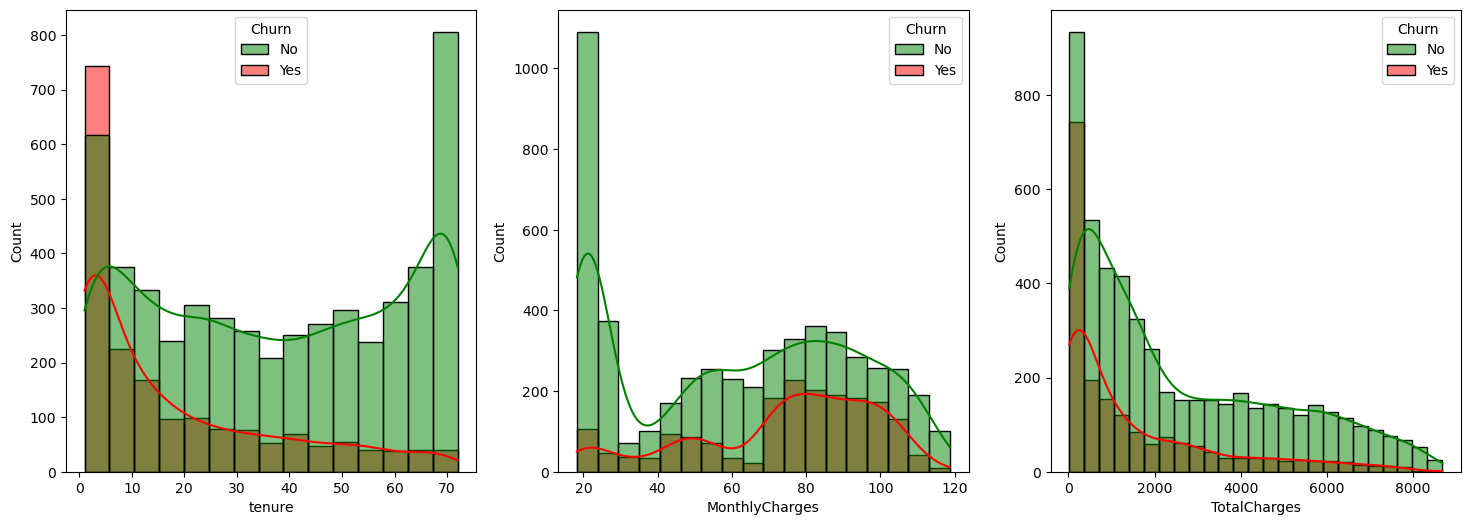

In [20]:
plt.figure(figsize=(18,6))

plt.title("Numerical columns distribution")
for i, col in enumerate(numerical_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df1, x=col, hue='Churn', palette={'Yes': 'red', 'No': 'green'}, kde=True)

Observations:  
- As the tenure increases the churn rate descreases
- more people are leaving the company whose monthly charges are between a particular range(70-100)
- As the total charges are increasing the leaving rate is decreasing

Meaning that the company is not able to retain/ engage the new customers  
they need to invest more time for how they could make it better for the first time users

In [21]:
for col in categorical_cols:
    print(f"{col}: {df1[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                  'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [23]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\2306103964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0}, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\2306103964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':

In [24]:
df1['gender'].replace({'Male':1, 'Female':0},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\1448694368.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male':1, 'Female':0},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\1448694368.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].r

In [25]:
df1['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'No':2},inplace=True)
df1['Contract'].replace({'Month-to-month':0, 'One year':1, 'Two year':2},inplace=True)
df1['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\3084825259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'No':2},inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11976\3084825259.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [26]:
for col in categorical_cols:
    print(f"{col}: {df1[col].unique()}")

gender: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [0 1 2]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [0 1 2 3]


<Axes: >

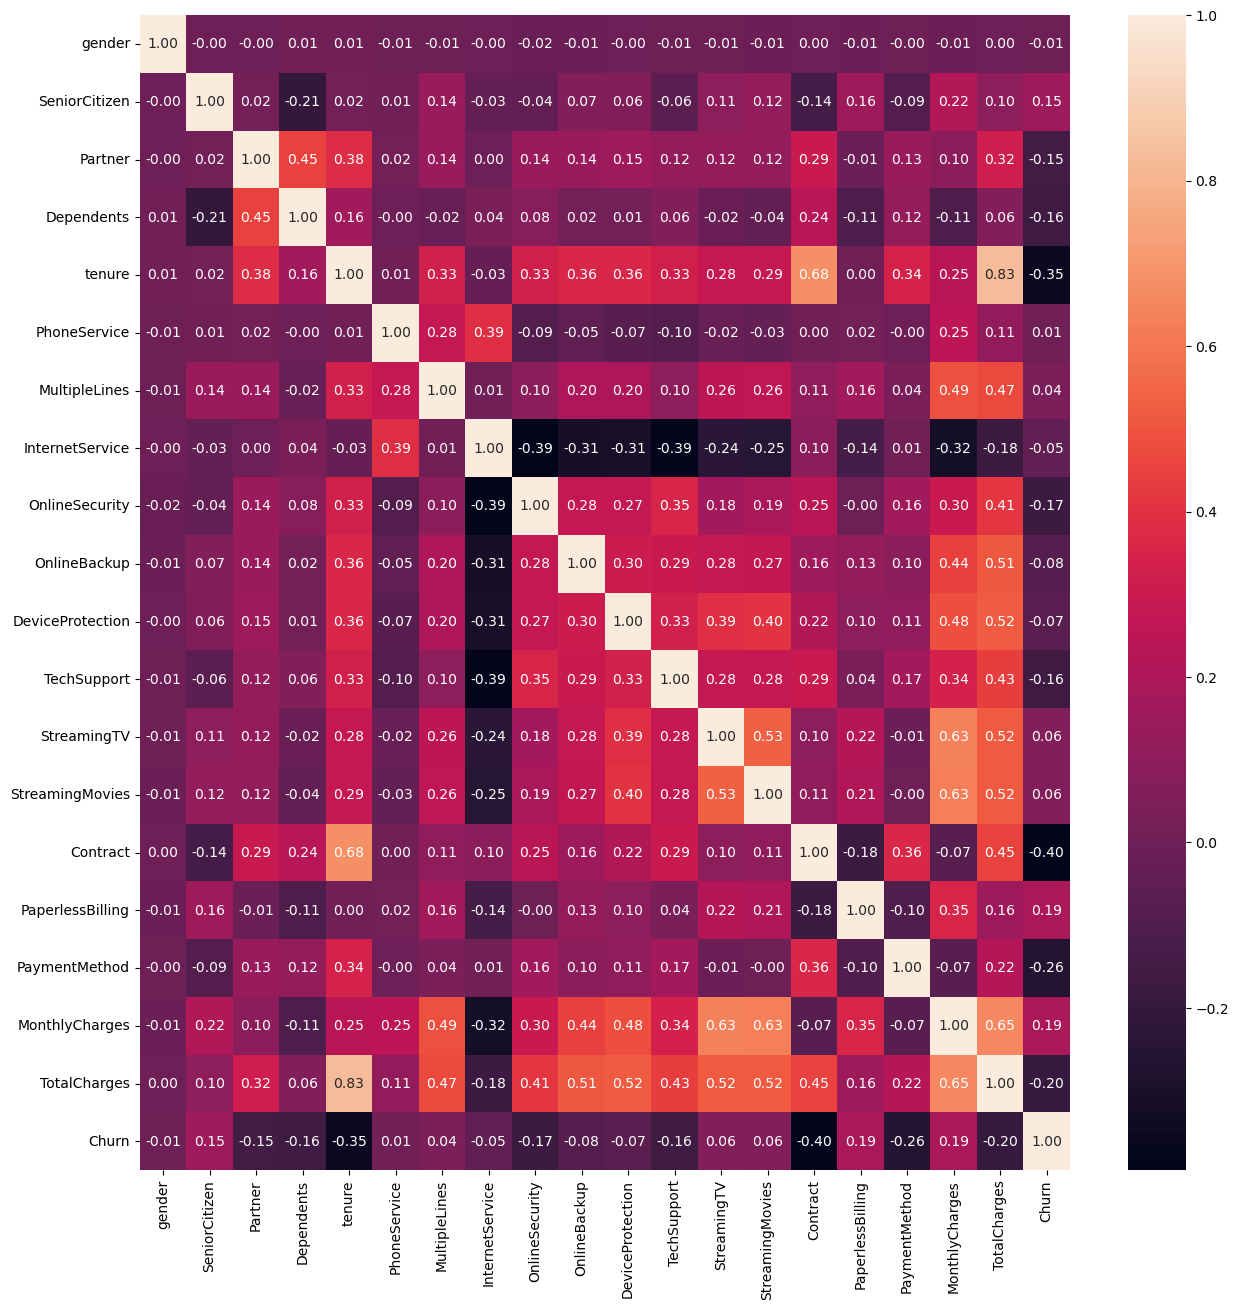

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')

In [152]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.315557,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Needs Scaling

### Modelling

In [28]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [156]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.00943013, -0.44032709,  1.03561683, ..., -1.14451953,
        -1.16169394, -0.99419409],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.27453128,
        -0.26087792, -0.17373982],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.27453128,
        -0.36392329, -0.95964911],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ..., -1.14451953,
        -1.17000405, -0.85451414],
       [ 0.99065797,  2.27103902,  1.03561683, ..., -0.27453128,
         0.31916782, -0.87209546],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  0.59545698,
         1.35793167,  2.01234407]])

In [157]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

#### Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [164]:
lr.coef_

array([-0.00244138,  0.01429542,  0.00263013, -0.01363912, -0.04344668,
       -0.05890902,  0.01147273,  0.00411093, -0.04346779, -0.026233  ,
       -0.02154705, -0.04032427, -0.01015397, -0.00840291, -0.02948731,
        0.020897  , -0.02513035,  0.22199   , -0.11346823])

In [165]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([ 0.09325671, -0.13846015,  0.19597799, ...,  0.49705642,
        0.10330701,  0.41517892])

In [254]:
y_pred_lr_=[]
for pred in y_pred_lr:
    if pred>0.45:
        y_pred_lr_.append(1)
    else:
        y_pred_lr_.append(0)

In [255]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [256]:
accuracy_score(y_test,y_pred_lr_)

0.7953091684434968

In [257]:
print(classification_report(y_test,y_pred_lr_))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1054
           1       0.59      0.58      0.59       353

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



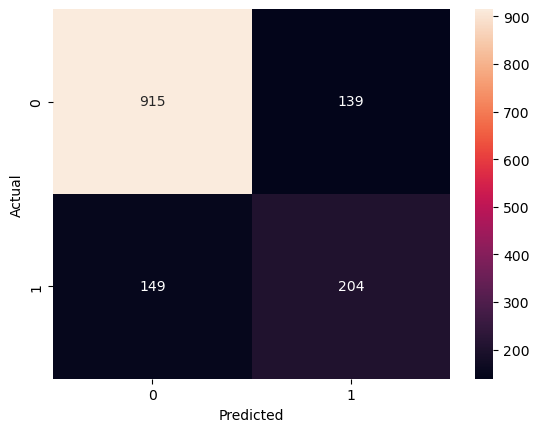

In [258]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr_), annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rf = RandomForestClassifier()

In [173]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [174]:
y_pred_rf = rf.predict(X_test)

In [175]:
y_pred_rf[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [176]:
accuracy_score(y_test, y_pred_rf)

0.7874911158493249

In [177]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1054
           1       0.60      0.47      0.52       353

    accuracy                           0.79      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.79      0.78      1407



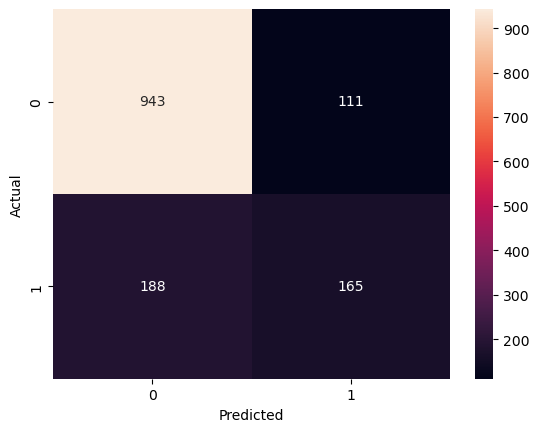

In [178]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt = DecisionTreeClassifier() 

In [181]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
y_pred_dt = dt.predict(X_test)
y_pred_dt[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [183]:
accuracy_score(y_test, y_pred_dt)

0.7277896233120114

In [184]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1054
           1       0.46      0.49      0.47       353

    accuracy                           0.73      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



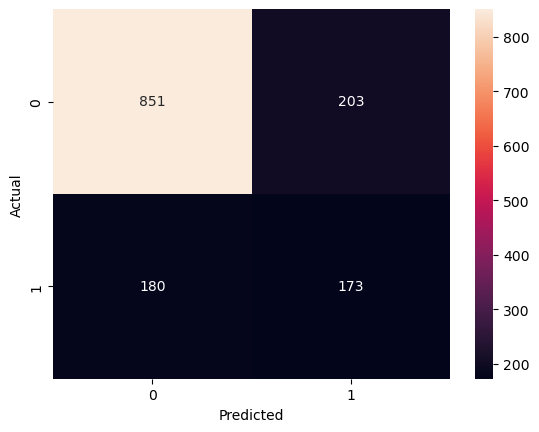

In [185]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
lg = LogisticRegression(solver='liblinear')

In [188]:
lg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [189]:
y_pred_lg = lg.predict(X_test)
y_pred_lg[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [190]:
accuracy_score(y_test, y_pred_lg)

0.8052594171997157

In [191]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1054
           1       0.63      0.54      0.58       353

    accuracy                           0.81      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



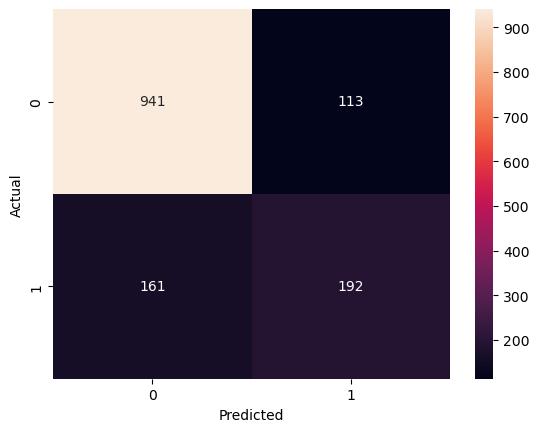

In [192]:
sns.heatmap(confusion_matrix(y_test, y_pred_lg), annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### MLPClassifier

In [193]:
from sklearn.neural_network import MLPClassifier

In [194]:
mlpc = MLPClassifier()

In [195]:
mlpc.fit(X_train, y_train)

D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [196]:
y_pred_mlpc = mlpc.predict(X_test)
y_pred_mlpc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
accuracy_score(y_test, y_pred_mlpc)

0.7945984363894811

In [198]:
print(classification_report(y_test, y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1054
           1       0.60      0.56      0.58       353

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



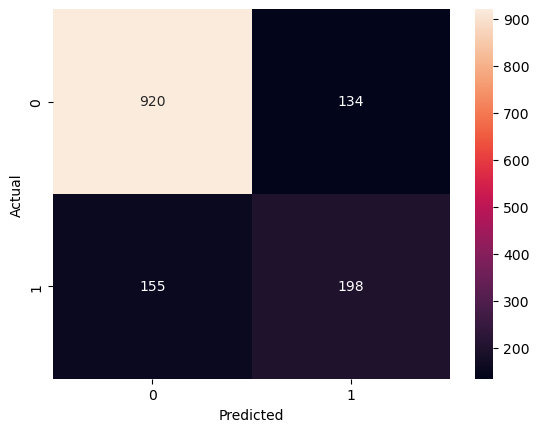

In [199]:
sns.heatmap(confusion_matrix(y_test, y_pred_mlpc), annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Gradient Boosting

In [200]:
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
gbc = GradientBoostingClassifier()

In [202]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [203]:
y_pred_gbc = gbc.predict(X_test)
y_pred_gbc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [204]:
accuracy_score(y_test, y_pred_gbc)

0.8059701492537313

In [205]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1054
           1       0.64      0.53      0.58       353

    accuracy                           0.81      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



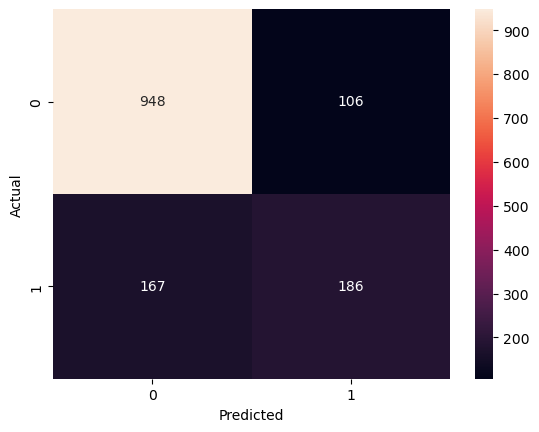

In [206]:
sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Results

In [263]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [280]:
def results(y_preds, y_test):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    for y_pred in y_preds:
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average=None))
        precision_scores.append(precision_score(y_test, y_pred, average=None))
        recall_scores.append(recall_score(y_test, y_pred, average=None))
    return accuracy_scores, f1_scores, precision_scores, recall_scores

In [281]:
y_preds = [y_pred_lr_, y_pred_lg, y_pred_dt, y_pred_rf, y_pred_mlpc, y_pred_gbc]

In [282]:
models = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Multi-Layer Perceptron', 'Gradient Boosting Classifier']

In [283]:
accuracy_scores, f1_scores, precision_scores, recall_scores = results(y_preds, y_test)

In [285]:
precision_scores

[array([0.85996241, 0.59475219]),
 array([0.853902 , 0.6295082]),
 array([0.82541222, 0.46010638]),
 array([0.83377542, 0.59782609]),
 array([0.85581395, 0.59638554]),
 array([0.85022422, 0.6369863 ])]

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


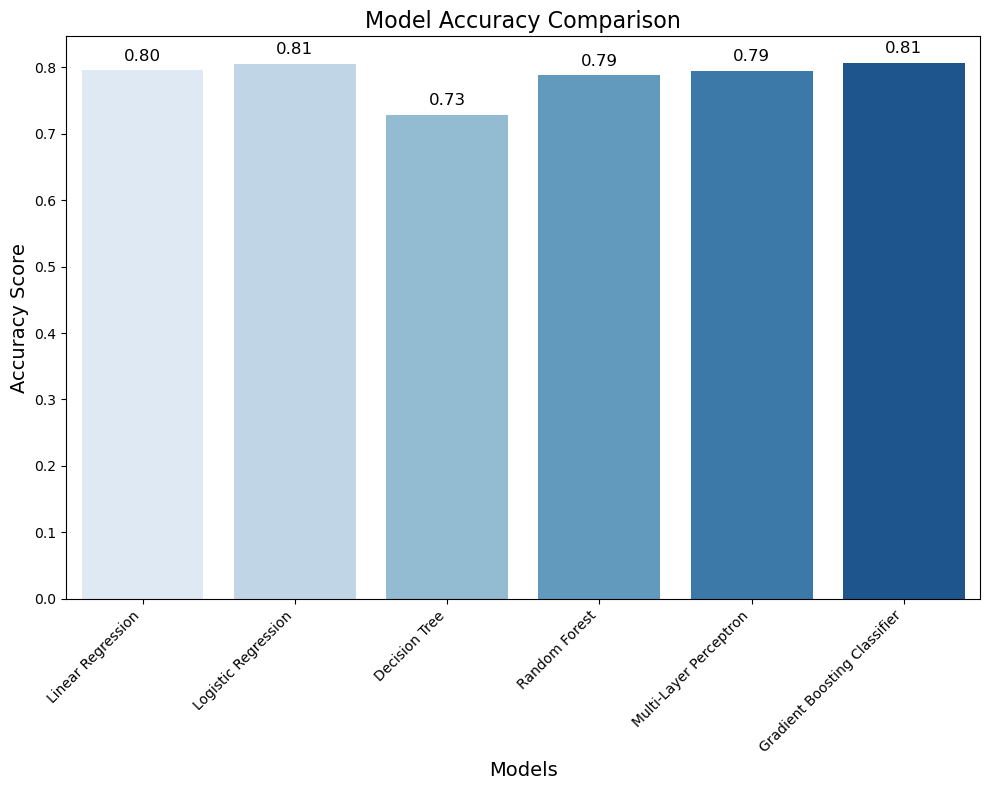

In [268]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=models, y=accuracy_scores, palette='Blues')

# Add value annotations on top of each bar
for i, score in enumerate(accuracy_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Set the title and axis labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [300]:
class_0_scores = {'f1': [], 'precision': [], 'recall': []}
class_1_scores = {'f1': [], 'precision': [], 'recall': []}

# Populate the class 0 and class 1 scores
for i in range(len(models)):
    class_0_scores['f1'].append(f1_scores[i][0])  # Class 0 F1 score
    class_1_scores['f1'].append(f1_scores[i][1])  # Class 1 F1 score
    
    class_0_scores['precision'].append(precision_scores[i][0])  # Class 0 precision
    class_1_scores['precision'].append(precision_scores[i][1])  # Class 1 precision
    
    class_0_scores['recall'].append(recall_scores[i][0])  # Class 0 recall
    class_1_scores['recall'].append(recall_scores[i][1])  # Class 1 recall

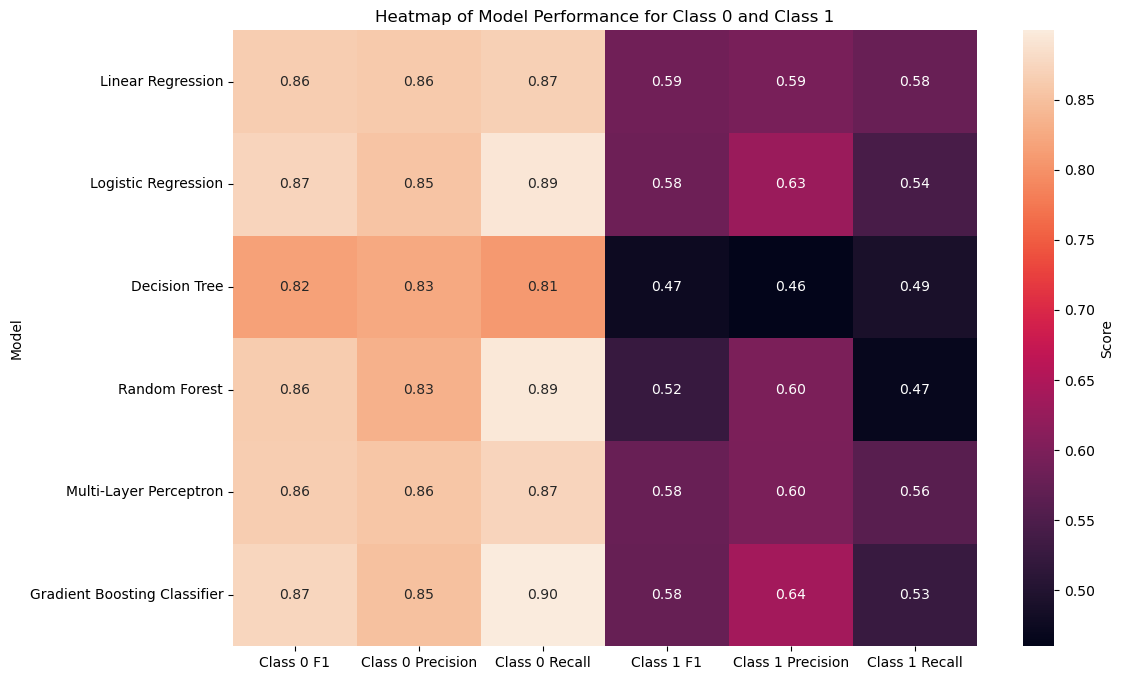

In [303]:
metrics_data = {
    'Model': models,  
    'Class 0 F1': class_0_scores['f1'],
    'Class 0 Precision': class_0_scores['precision'],
    'Class 0 Recall': class_0_scores['recall'], 
    'Class 1 F1': class_1_scores['f1'],  
    'Class 1 Precision': class_1_scores['precision'],   
    'Class 1 Recall': class_1_scores['recall']
}

# Create a DataFrame with metrics data
df_metrics = pd.DataFrame(metrics_data)

# Now plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_metrics.set_index('Model'), annot=True, fmt='.2f', cbar_kws={'label': 'Score'})
plt.title('Heatmap of Model Performance for Class 0 and Class 1')
plt.show()
